In [17]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
credit = pd.read_csv('/content/drive/MyDrive/UW/WXML/credit_astro.csv')

In [21]:
credit = credit.drop(columns = 'Unnamed: 0')

In [22]:
credit['Date_Birth'] = pd.to_datetime(credit['Date_Birth'], format='%Y-%m-%d')
credit['Date_Employed'] = pd.to_datetime(credit['Date_Employed'], format='%Y-%m-%d')

In [23]:
credit['birth_epoch'] = credit['Date_Birth'].astype('int64') // 1e9
credit['employed_epoch'] = credit['Date_Employed'].astype('int64') // 1e9

In [24]:
credit

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,Date_Birth,Date_Employed,Sign_Birth,higher_Sign_Birth,lower_Sign_Birth,birth_epoch,employed_epoch
0,0,1,1,0,427500.0,3,0,0,2.0,1987-05-12,2007-10-17,"[2, 8, 2, 1, 3, 1, 9, 9, 10]",4180419301,683833065,547776000.0,1.192579e+09
1,0,1,1,0,112500.0,1,1,1,2.0,1961-06-08,2017-02-14,"[3, 1, 4, 2, 5, 11, 10, 5, 8]",3182646386,869271751,-270345600.0,1.487030e+09
2,1,0,1,0,270000.0,1,2,1,1.0,1967-11-28,2011-11-16,"[9, 7, 8, 7, 10, 6, 1, 6, 8]",3190473152,3677434627,-66096000.0,1.321402e+09
3,0,1,1,0,270000.0,3,1,1,2.0,1974-01-13,2018-02-14,"[10, 6, 10, 11, 2, 11, 3, 7, 9]",3663344085,4078394864,127267200.0,1.518566e+09
4,0,1,1,0,135000.0,1,1,1,2.0,1971-07-22,2016-12-16,"[4, 4, 5, 4, 11, 8, 3, 7, 9]",3662771367,1410350768,48988800.0,1.481846e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74393,1,0,0,2,90000.0,3,2,1,4.0,1976-04-02,2016-09-26,"[1, 2, 1, 12, 4, 2, 4, 8, 9]",3699964236,38633420,197251200.0,1.474848e+09
74394,0,0,0,1,135000.0,1,3,1,2.0,1984-09-17,2019-09-27,"[6, 3, 6, 7, 9, 10, 8, 9, 9]",3749826413,2238177560,464227200.0,1.569542e+09
74395,0,0,1,0,202500.0,3,0,1,2.0,1983-03-29,2013-11-27,"[1, 7, 1, 2, 1, 9, 8, 9, 9]",3749402376,215254616,417744000.0,1.385510e+09
74396,1,0,1,0,180000.0,3,1,1,2.0,1990-03-16,2012-10-28,"[12, 8, 12, 11, 11, 4, 10, 10, 10]",4220168207,5016169413,637545600.0,1.351382e+09


In [25]:
credit['year'] = credit['Date_Birth'].dt.year
credit['month'] = credit['Date_Birth'].dt.month
credit['day'] = credit['Date_Birth'].dt.day

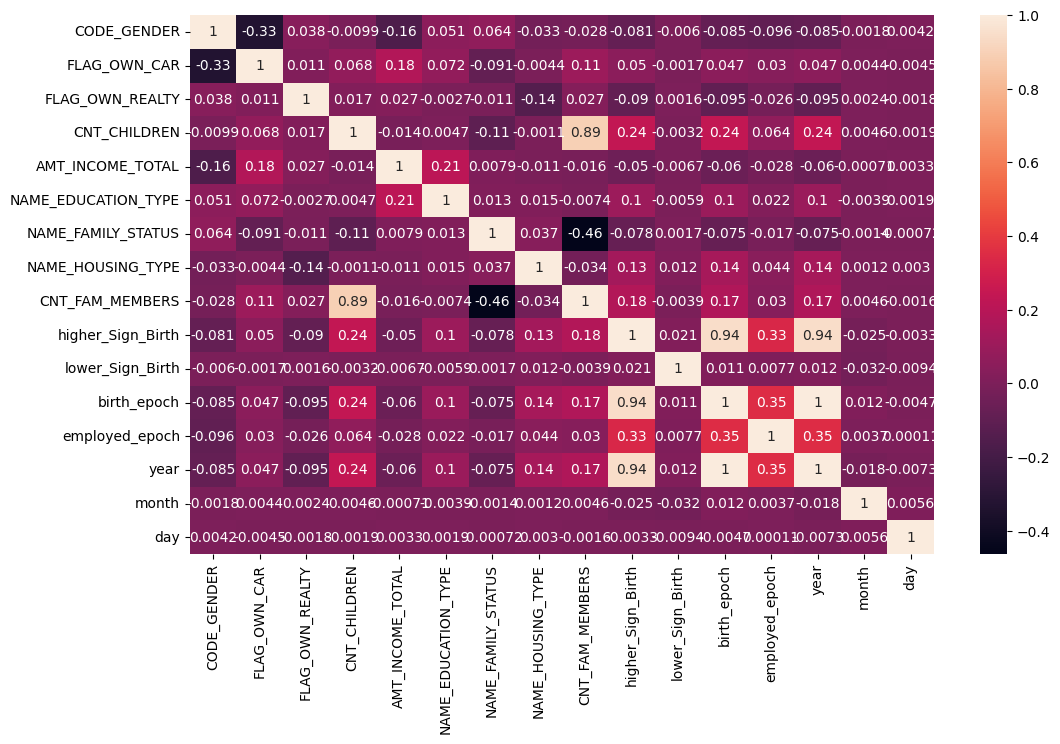

In [26]:
cols_list = credit.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(credit[cols_list].corr(), annot = True) #annotation shows the numbers in each box
plt.show()

In [27]:
predict = 'FLAG_OWN_CAR'

In [28]:
Y = credit[predict]

In [29]:
# X = credit.drop(columns = [predict, 'Sign_Birth', 'higher_Sign_Birth', 'lower_Sign_Birth'])
X = credit[['CODE_GENDER', 'AMT_INCOME_TOTAL', 'higher_Sign_Birth']]

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=1,stratify=Y)

In [31]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [32]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Fitting with training data

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     35857
           1       0.89      0.70      0.78     23661

    accuracy                           0.85     59518
   macro avg       0.86      0.82      0.83     59518
weighted avg       0.85      0.85      0.84     59518



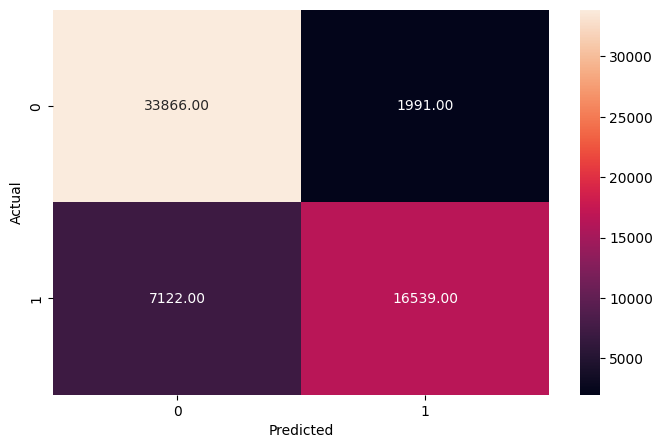

In [33]:
pred_train = model.predict(X_train)
metrics_score(y_train, pred_train)

Check performance with test data

              precision    recall  f1-score   support

           0       0.66      0.76      0.70      8965
           1       0.52      0.40      0.45      5915

    accuracy                           0.61     14880
   macro avg       0.59      0.58      0.58     14880
weighted avg       0.60      0.61      0.60     14880



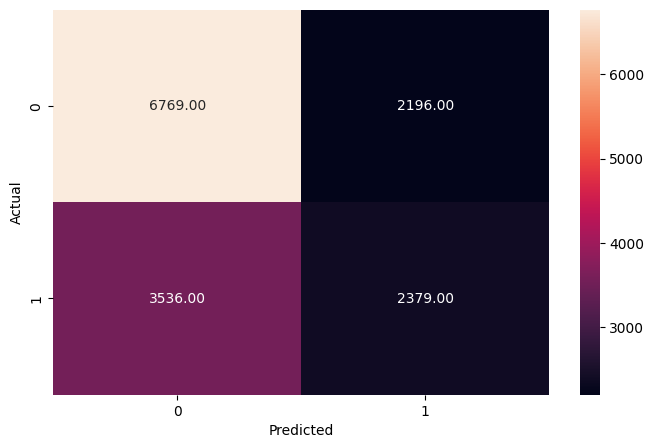

In [34]:
pred_test = model.predict(X_test)
metrics_score(y_test, pred_test)

Using grid search

In [35]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 100, 10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50, min_samples_split=70,
                       random_state=1)

It always returns the least max_depth, not sure why yet.
Fitting the best model returned by grid search and fitting with training data.

              precision    recall  f1-score   support

           0       0.72      0.79      0.75     35857
           1       0.63      0.53      0.57     23661

    accuracy                           0.69     59518
   macro avg       0.67      0.66      0.66     59518
weighted avg       0.68      0.69      0.68     59518



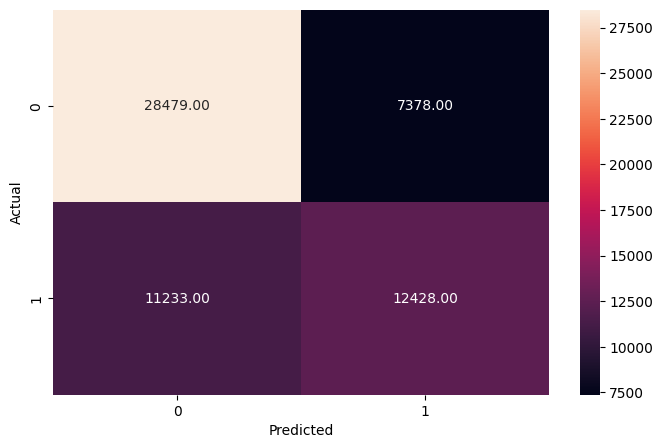

In [36]:
train_tuned = estimator.predict(X_train)
metrics_score(y_train, train_tuned)

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      8965
           1       0.62      0.51      0.56      5915

    accuracy                           0.68     14880
   macro avg       0.67      0.65      0.66     14880
weighted avg       0.68      0.68      0.68     14880



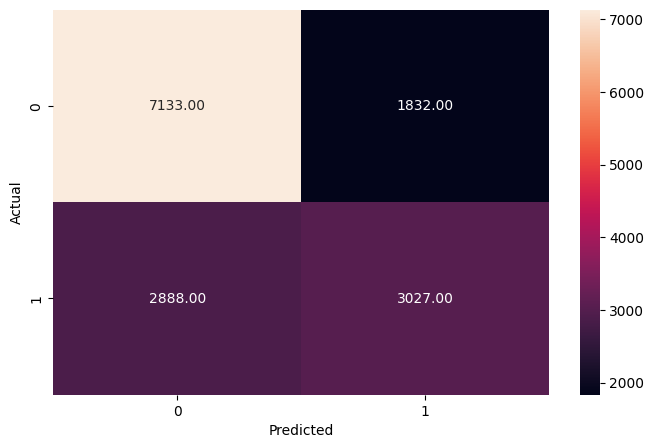

In [37]:
pred_tuned = estimator.predict(X_test)
metrics_score(y_test,pred_tuned)

Check the ratio of the majority class to see if the model performs better than a majority classifier model.

In [40]:
credit[predict].value_counts()

FLAG_OWN_CAR
0    44822
1    29576
Name: count, dtype: int64

In [83]:
44822 / len(credit)

0.6024624317858007

In [82]:
model.feature_importances_

array([0.76191869, 0.23808131])